The imports

In [1]:
import numpy
import pandas as pd
import yfinance as yf
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

Outputting the price table of a certain stock, which is currently Apple

In [2]:
stock = 'MSFT'

data_for_stock = yf.Ticker(stock)
data_for_stock = data_for_stock.history(period="10y")

del data_for_stock["Dividends"]
data_for_stock["Tomorrow"] = data_for_stock["Close"].shift(-1)
data_for_stock["Target"] = (data_for_stock["Tomorrow"] > data_for_stock["Close"]).astype(int)

data_for_stock

,Open,High,Low,Close,Volume,Stock Splits,Tomorrow,Target
Date,,,,,,,,
2013-11-25 00:00:00-05:00,31.939195,31.956036,31.636054,31.694998,30646800,0.0,31.450815,0
2013-11-26 00:00:00-05:00,31.636069,31.703435,31.450815,31.450815,34465300,0.0,31.661331,1
2013-11-27 00:00:00-05:00,31.636071,31.796060,31.568708,31.661331,26002100,0.0,32.107616,1
2013-11-29 00:00:00-05:00,31.846578,32.242345,31.846578,32.107616,22090400,0.0,32.377071,1
2013-12-02 00:00:00-05:00,32.073931,32.654948,32.048670,32.377071,42950400,0.0,32.259190,0
...,...,...,...,...,...,...,...,...
2023-11-17 00:00:00-05:00,373.609985,374.369995,367.000000,369.850006,40157000,0.0,377.440002,1
2023-11-20 00:00:00-05:00,371.220001,378.869995,371.000000,377.440002,52465100,0.0,373.070007,0
2023-11-21 00:00:00-05:00,375.670013,376.220001,371.119995,373.070007,28423100,0.0,377.850006,1


The below is to plot the stocks over time.

Text(0.5, 1.0, 'The Stock Price')

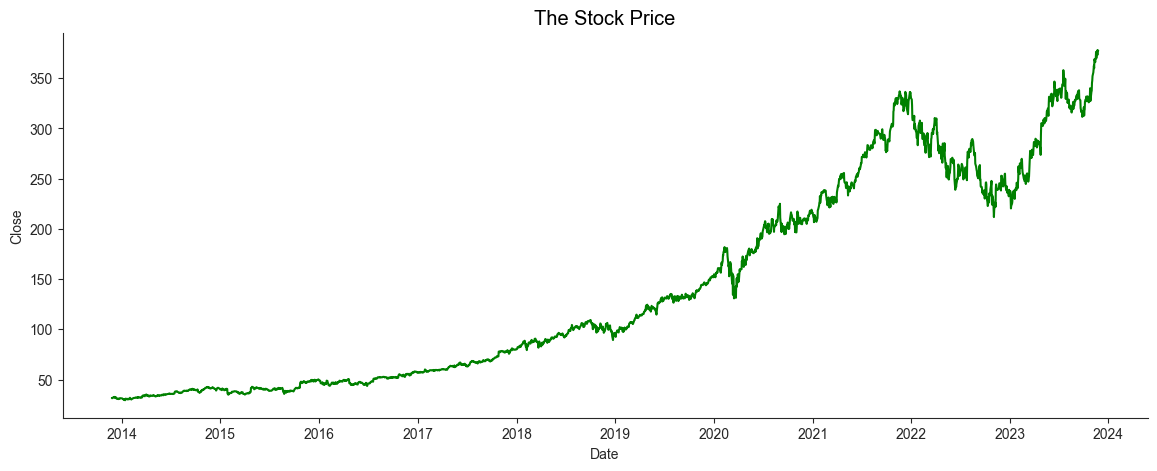

In [3]:
plt.figure(figsize=(14,5))
sns.set_style("ticks")
sns.lineplot(data=data_for_stock,x="Date",y='Close',color='green')
sns.despine()
plt.title("The Stock Price",size='x-large',color='black')

Creating the training and testing data

In [4]:
import sklearn

62


Text(0.5, 1.0, 'The Training Data')

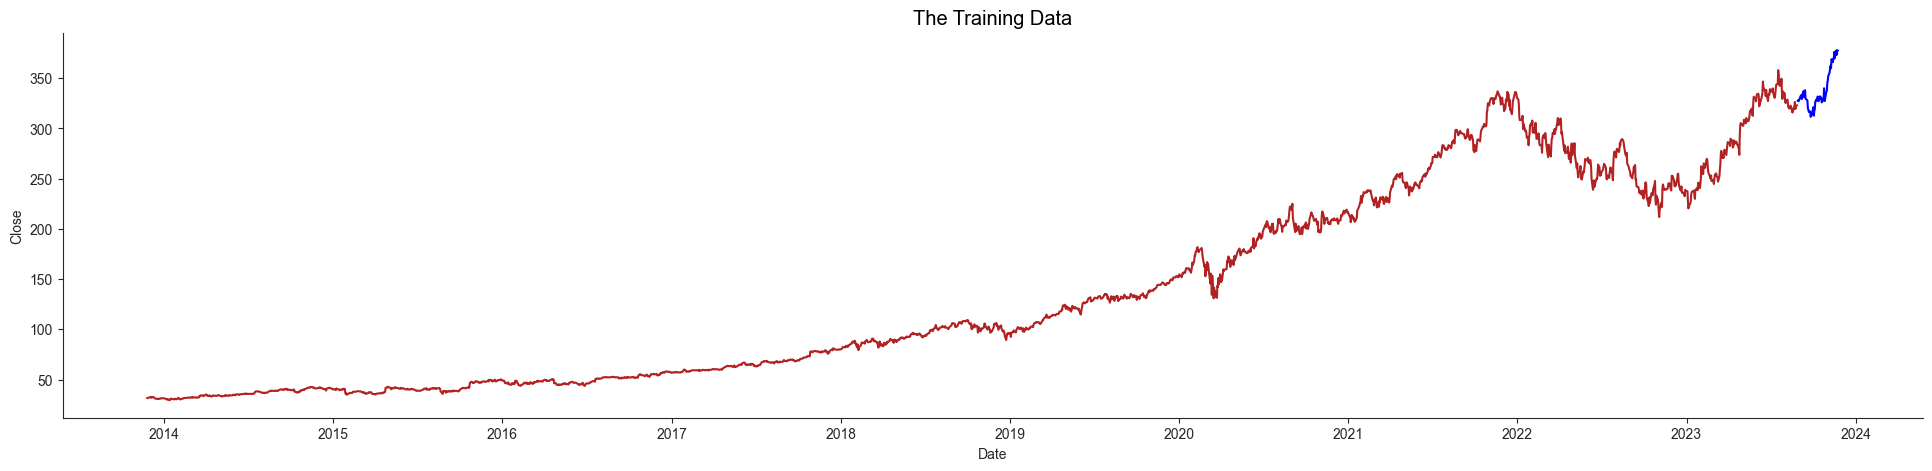

In [5]:
testing_percentage = 0.025
train_d = data_for_stock[:int(-1*len(data_for_stock)*(testing_percentage))]
test_d = data_for_stock[int(-1*len(data_for_stock)*testing_percentage):]

print(len(test_d))

plt.figure(figsize=(24,5))
sns.set_style("ticks")
sns.lineplot(data=train_d,x="Date",y='Close',color='firebrick')
sns.lineplot(data=test_d,x="Date", y='Close', color='blue')
sns.despine()
plt.title("The Training Data",size='x-large',color='black')

In [6]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=150, min_samples_split=150, random_state=1)
predictors = ["Close", "Open", "High", "Low", "Volume"]
model.fit(train_d[predictors], train_d["Target"])

RandomForestClassifier(min_samples_split=150, n_estimators=150, random_state=1)

In [7]:
from sklearn.metrics import precision_score

predictions = model.predict(test_d[predictors])
predictions = pd.Series(predictions, index=test_d.index)
# for p in predictions:
#     print(p)
precision_score(test_d["Target"], predictions)

0.5862068965517241